In [1]:
%run ./get_fixed_variables.ipynb

In [2]:
## Soil moisture [kg/m2]

SOILLIQ_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SOILLIQ_8xco2_strato.npy')
SOILLIQ_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SOILLIQ_8xco2_nostrato.npy')
SOILLIQ_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SOILLIQ_PI_strato.npy')
SOILLIQ_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SOILLIQ_PI_nostrato.npy')
SOILLIQ_8xco2= np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SOILLIQ_8xco2_spinup.npy')
SOILLIQ_1xco2 = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SOILLIQ_PI.npy')

## PRECC (convective precip) [m/s]

PRECC_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECC_8xco2_strato.npy')
PRECC_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECC_8xco2_nostrato.npy')
PRECC_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECC_PI_strato.npy')
PRECC_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECC_PI_nostrato.npy')

## PRECL (large-scale stable precip) [m/s]

PRECL_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECL_8xco2_strato.npy')
PRECL_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECL_8xco2_nostrato.npy')
PRECL_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECL_PI_strato.npy')
PRECL_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECL_PI_nostrato.npy')

## LHFLX (latent heat flux) [Wm2]

LHFLX_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LHFLX_8xco2_strato.npy')
LHFLX_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LHFLX_8xco2_nostrato.npy')
LHFLX_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LHFLX_PI_strato.npy')
LHFLX_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LHFLX_PI_nostrato.npy')

## TMQ (total column water vapor) [kg/m2]

TMQ_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TMQ_8xco2_strato.npy')
TMQ_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TMQ_8xco2_nostrato.npy')

TMQ_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TMQ_PI_strato.npy')
TMQ_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/TMQ_PI_nostrato.npy')


## FLDS (total column water vapor) [kg/m2]

FLDS_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLDS_8xco2_strato.npy')
FLDS_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLDS_8xco2_nostrato.npy')

FLDS_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLDS_PI_strato.npy')
FLDS_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/FLDS_PI_nostrato.npy')


In [3]:
conv = 1000*60*60*24
LANDMASK_nan = LANDMASK*np.nan
LANDMASK_nan[yearly_avg(SOILLIQ_8xco2[:,0,:,:], 30) < 1e10] = 1
S1_vars = np.array([[yearly_avg(SOILLIQ_8xco2[:,0,:,:]*LANDMASK_nan, 30), yearly_avg(SOILLIQ_1xco2[:,0,:,:]*LANDMASK_nan, 30)],
                         [yearly_avg(SOILLIQ_8xco2_nostrato[:,0,:,:]*LANDMASK_nan, 30)-yearly_avg(SOILLIQ_8xco2_strato[:,0,:,:]*LANDMASK_nan, 30), yearly_avg(SOILLIQ_1xco2_nostrato[:,0,:,:]*LANDMASK_nan, 30)-yearly_avg(SOILLIQ_1xco2_strato[:,0,:,:]*LANDMASK_nan, 30)],
                         [yearly_avg(PRECC_8xco2_nostrato+PRECL_8xco2_nostrato, 30)*conv-yearly_avg(PRECC_8xco2_strato+PRECL_8xco2_strato,30)*conv, yearly_avg(PRECC_1xco2_nostrato+PRECL_1xco2_nostrato, 30)*conv-yearly_avg(PRECC_1xco2_strato+PRECL_1xco2_strato,30)*conv]])
levels_list = [[np.linspace(0,10,33),np.linspace(0,10,33)],
               [np.linspace(-2,2,33),np.linspace(-2,2,33)],
               [np.linspace(-4,4,33),np.linspace(-4,4,33)]]
cmap_list = np.array([['viridis','viridis'],
                      ['RdBu_r','RdBu_r'],
                      ['RdBu_r','RdBu_r']])
title_list = np.array([['Surface Soil Moisture (kg/m$^{2}$) \n in 8xCO$_2$-control', 'Surface Soil Moisture (kg/m$^{2}$) \n in 1xCO$_2$-control'],
                       ['$\\Delta$ Surface Soil Moisture (kg/m$^{2}$) \n in 8xCO$_2$-locked $\\it{no}$-$\\it{strato} - \\it{strato}$', '$\\Delta$ Surface Soil Moisture (kg/m$^{2}$) \n in 1xCO$_2$-locked $\\it{no}$-$\\it{strato} - \\it{strato}$'],
                       ['$\\Delta$ Precipiation (mm/day) \n in 8xCO$_2$, $\\it{no}$-$\\it{strato} - \\it{strato}$', '$\\Delta$ Precipiation (mm/day) \n in 1xCO$_2$, $\\it{no}$-$\\it{strato} - \\it{strato}$']])


text_list = np.array([['A','B'],['C','D'],['E','F']])


/glade/derecho/scratch/asalazar/tmp/ipykernel_40608/3721108563.py:16: RuntimeWarning: Mean of empty slice
  def yearly_avg(x, year_range): return(np.nanmean(x[-12*year_range:], axis =0 ))


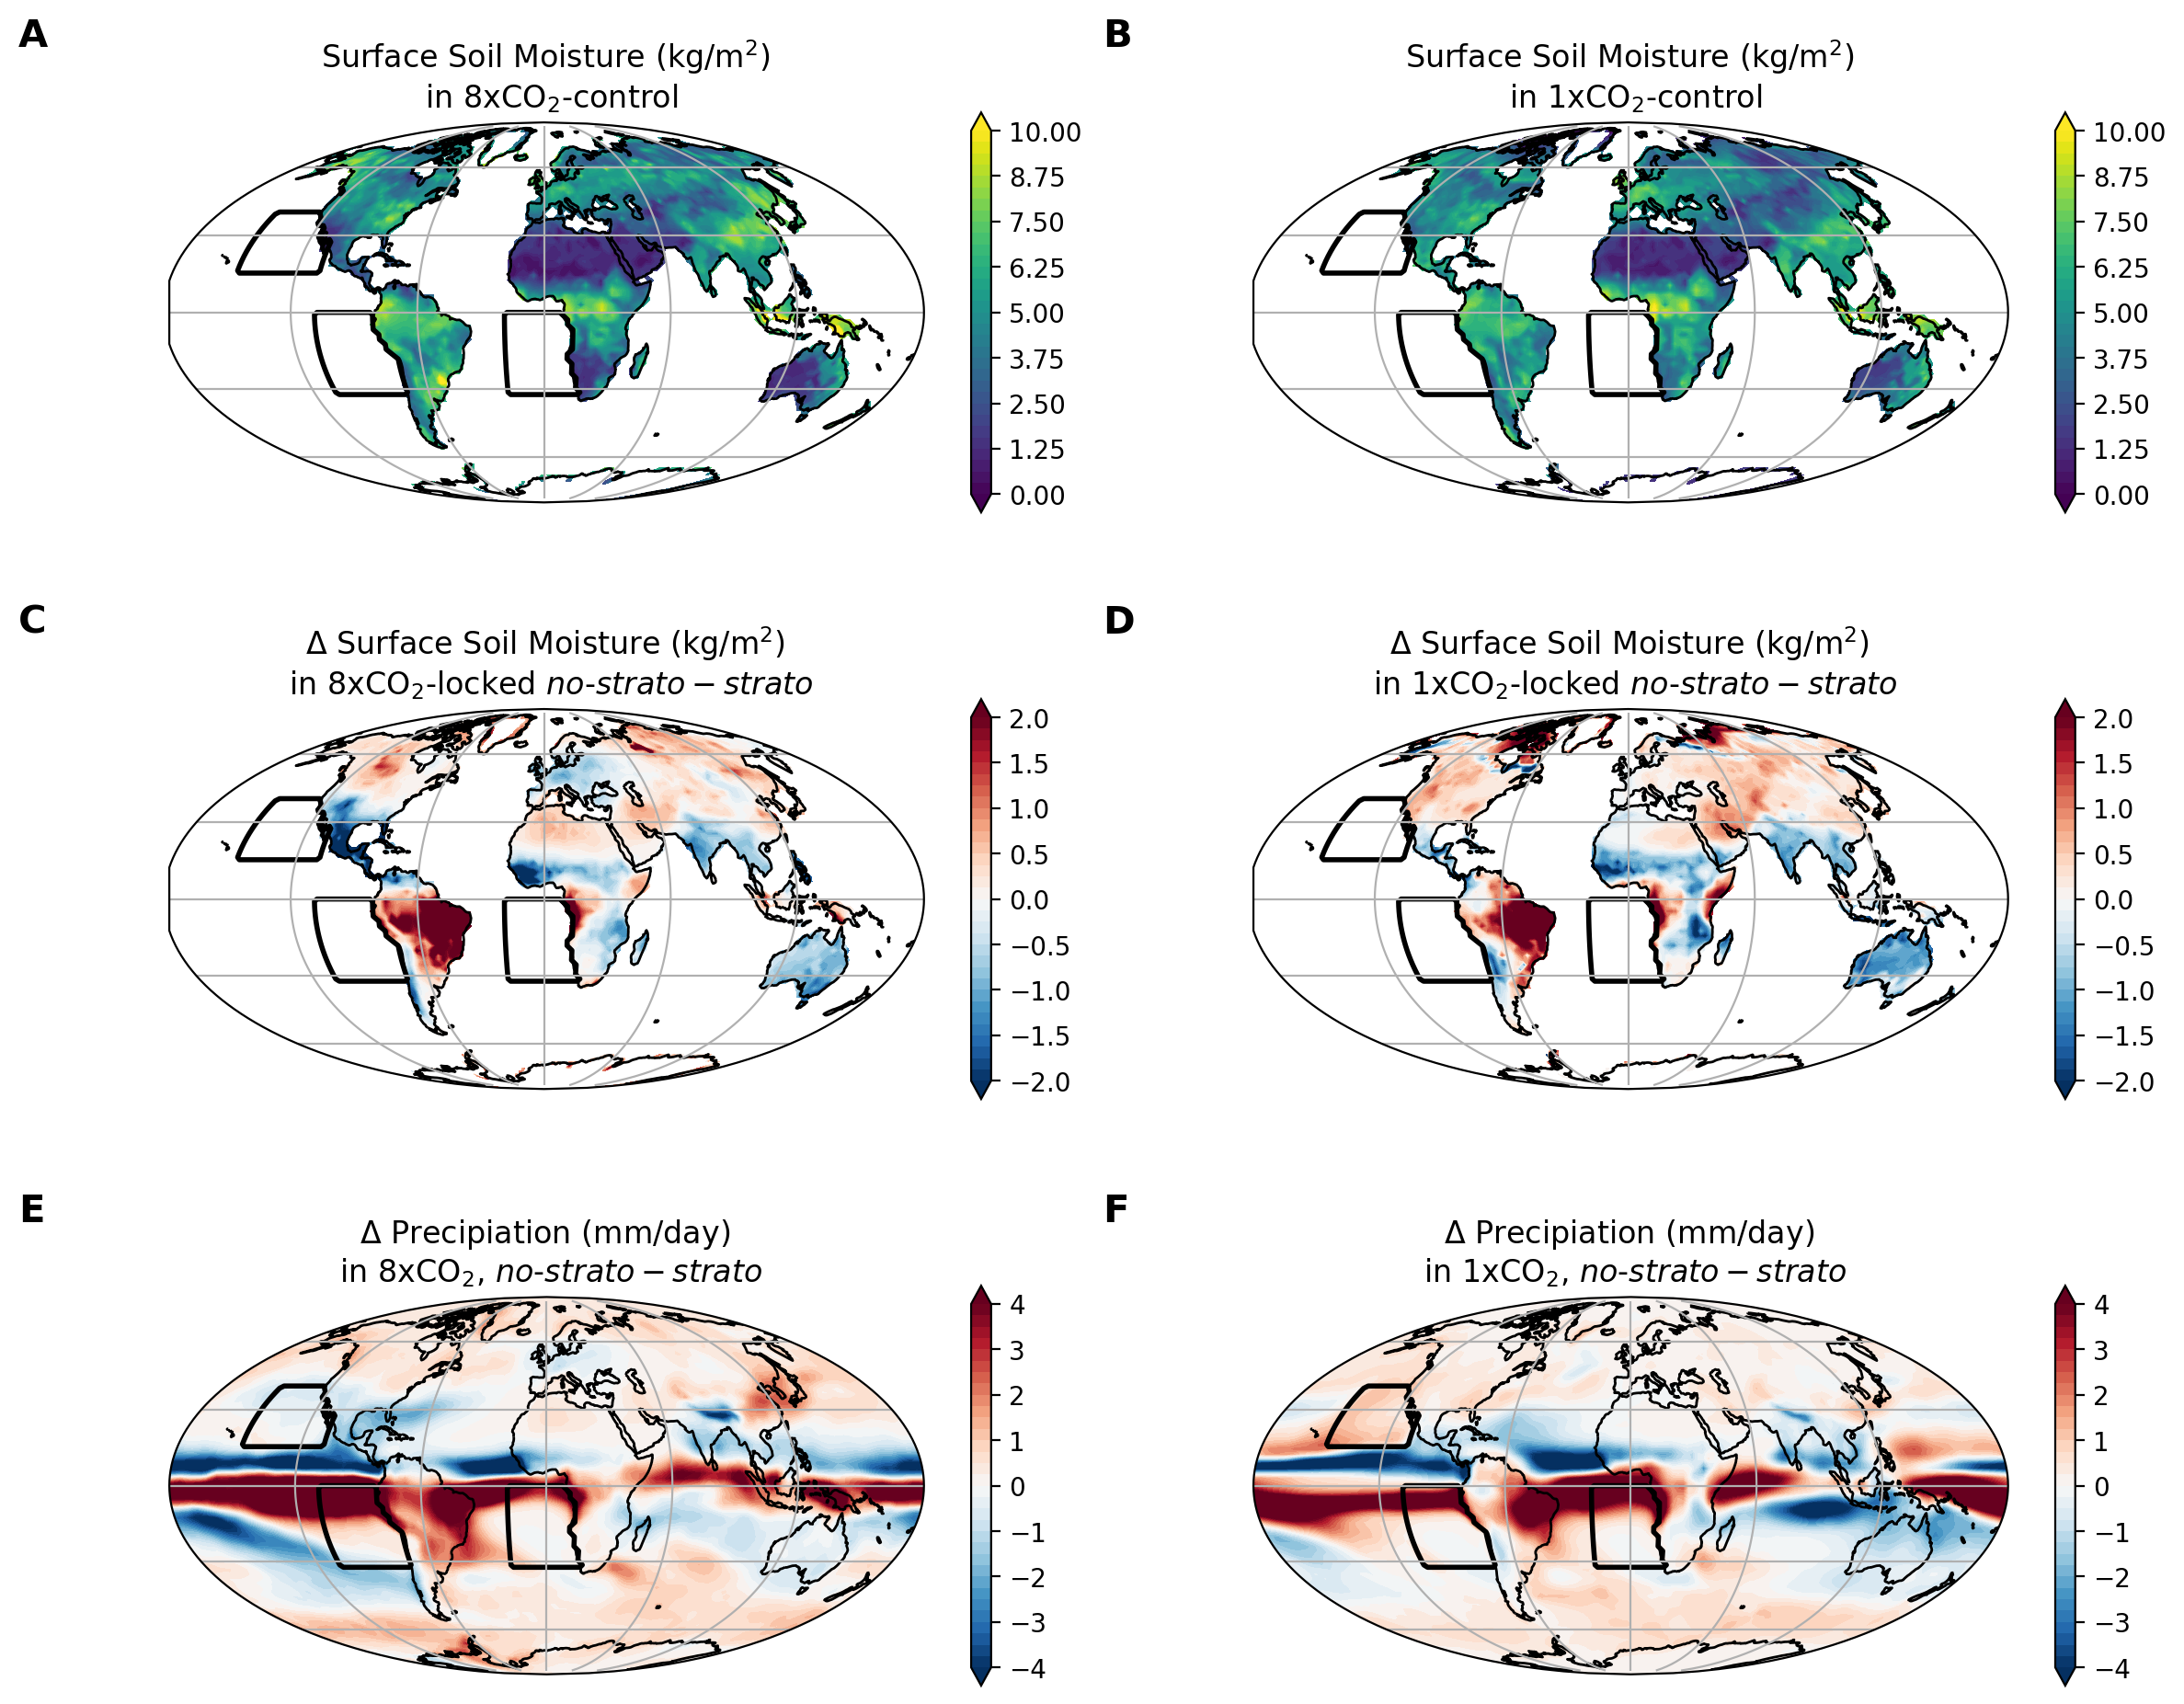

In [5]:
extend = 'both'
shrink = 0.7
make_subplots(S1_vars, levels_list,cmap_list, title_list, 'Figure_S6', text_list, (12,10))